In [1]:
import numpy as np
import random
import pandas as pd

In [2]:
import sys
sys.path.append('../')

In [3]:
from assesssample import AssessVarQuant

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
a = [0.1, 0.1, 0.2, 0.2, 0.3, 0.4, 0.5, 0.8]

In [6]:
edges = np.linspace(0, max(a)+min(a), num=5)
dict_edges = {}
dict_count = {}
for i,(s,e) in enumerate(zip(edges[:-1], edges[1:])):
    dict_edges[i] = (s,e)
    dict_count[i] = sum((s< a) & (a <= e))/len(a)

In [7]:
dict_count

{0: 0.5, 1: 0.25, 2: 0.125, 3: 0.125}

In [8]:
dict_edges

{0: (0.0, 0.225), 1: (0.225, 0.45), 2: (0.45, 0.675), 3: (0.675, 0.9)}

In [9]:
samples = []
n_sample = 3
for i, freq in dict_count.items():
    n = int(round(n_sample * freq))
    s,e = dict_edges[i]
    
    vals = [x for x in a if ((x > s) and (x <=e))]
    samples.append(random.choices(vals, k=n))

In [10]:
[x for sublist in samples for x in sublist]

[0.1, 0.2, 0.4]

In [11]:
def sample_index_list(a, n_samples, bins=10):
    a = list(a)
    edges = np.linspace(0, max(a)+min(a), num=bins)
    dict_edges = {}
    dict_count = {}
    for i,(s,e) in enumerate(zip(edges[:-1], edges[1:])):
        dict_edges[i] = (s,e)
        dict_count[i] = sum((s< a) & (a <= e))/len(a)
    samples = []
    for i, freq in dict_count.items():
        n = int(round(n_samples * freq))
        s,e = dict_edges[i]
        vals = [a.index(x) for x in a if ((x > s) and (x <=e))]
        n_val = random.choices(vals, k=n)
        samples.append(n_val)
    samples = [x for sublist in samples for x in sublist]
    return samples

In [12]:
sample_index_list(a, 3)

[0, 2]

In [13]:
[a[i] for i in sample_index_list(a,3)]

[0.1, 0.2]

In [14]:
data = pd.read_csv('../data/iris.csv')

In [15]:
sample_idx = sample_index_list(data.sepal_length, 30)
sample = [data.sepal_length[i] for i in sample_idx]
avq = AssessVarQuant(sample, data.sepal_length)

avq.evaluate()

0.9999809077910143

In [23]:
freq_sampling = []
bin_var_sampling =[]
rdm_sampling = []
bins = []
for i in range(5,100, 5):
    print('Step %d' % i)
    sample_idx = sample_index_list(data.sepal_length, 30)
    sample = [data.sepal_length[i] for i in sample_idx]
    avq = AssessVarQuant(sample, data.sepal_length)
    freq_sampling.append(avq.evaluate())
    
    for _ in range(3):
        bins.append(i)
        sample_idx = sample_index_list(data.sepal_length, 30, bins=i)
        sample = [data.sepal_length[i] for i in sample_idx]
        avq = AssessVarQuant(sample, data.sepal_length)
        bin_var_sampling.append(avq.evaluate())
    
    sample = data.sepal_length.sample(30)
    avq = AssessVarQuant(sample, data.sepal_length)
    rdm_sampling.append(avq.evaluate())

Step 5
Step 10
Step 15
Step 20
Step 25
Step 30
Step 35
Step 40
Step 45
Step 50
Step 55
Step 60
Step 65
Step 70
Step 75
Step 80
Step 85
Step 90
Step 95


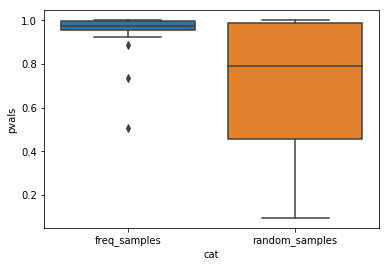

In [24]:
df = pd.DataFrame({'pvals': freq_sampling+rdm_sampling, 
                   'cat': ['freq_samples']*len(freq_sampling) + ['random_samples']*len(rdm_sampling)})
sns.boxplot(x='cat', y='pvals', data=df)
plt.show()

/home/michael/Documents/data_repr/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


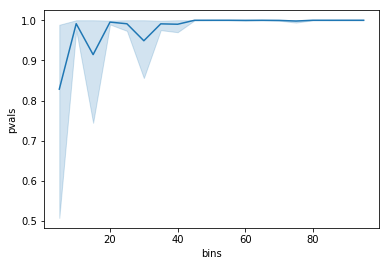

In [25]:
df = pd.DataFrame({'pvals': bin_var_sampling, 
                   'bins': bins})
sns.lineplot(x='bins', y='pvals', data=df)
plt.show()